In [1]:
import pandas as pd
import numpy as np
import datetime, random, json, time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

from brownie import web3, network, Wei, Contract, project
from brownie.network.account import LocalAccount

sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200

In [2]:
network_selected = "ropsten"
network.connect(network_selected)

# Loading the metamask accounts
## Trading account
fss_trading_private_key = "faba88e53b6fac655f7e0b5cb900e0bc045e787eb850fdf17f458f0fb8607bde"
fss_trading_account = web3.eth.account.from_key(private_key=fss_trading_private_key)
local_account_trading = LocalAccount(fss_trading_account.address, fss_trading_account, fss_trading_account.privateKey)
## Admin account
fss_admin_private_key = "ede4dd8a3584fd7809a5e0bb299ff8f51983af5b1a9f1f506165b5c1f09e22b1"
fss_admin_account = web3.eth.account.from_key(private_key=fss_admin_private_key)
local_account_admin = LocalAccount(fss_admin_account.address, fss_admin_account, fss_admin_account.privateKey)

In [3]:
with open('../../blockchain_course_unimi/challenge/teamCST/abi/PayCoin.json') as json_file: 
    payCoin_abi = json.load(json_file)
payCoin = Contract.from_abi('PayCoin', address='0xa501cA3B72d8D90235BD8ADb2c67aCc062F451FA', abi=payCoin_abi)
web3_payCoin = web3.eth.contract(abi=payCoin_abi, address='0xa501cA3B72d8D90235BD8ADb2c67aCc062F451FA')
                                 
with open('../../blockchain_course_unimi/challenge/teamCST/abi/ERC20Challenge.json') as json_file: 
    token_CST_abi = json.load(json_file)
token_CST = Contract.from_abi('TokenCST', address='0x247aC570E31C7B07829Ddc4B284AB5Bb55BEC825', abi=token_CST_abi)
web3_token_CST = web3.eth.contract(abi=token_CST_abi, address='0x247aC570E31C7B07829Ddc4B284AB5Bb55BEC825')

with open('../../blockchain_course_unimi/challenge/teamAA/abi/real/token.json') as json_file: 
    token_AA_abi = json.load(json_file)
token_AA = Contract.from_abi('TokenAA', address='0x5F61E047C53b398CA6aCcD964B117FF4b520535C', abi=token_AA_abi)
web3_token_AA = web3.eth.contract(abi=token_AA_abi, address='0x5F61E047C53b398CA6aCcD964B117FF4b520535C')

with open('../pyscripts/abi/token_erc20.json') as json_file: 
    token_FSS_abi = json.load(json_file)
token_FSS = Contract.from_abi('TokenFSS', address='0xFBDE8b1b7F1F513a1a61b63f285348Da22CbfF2f', abi=token_FSS_abi)
web3_token_FSS = web3.eth.contract(abi=token_FSS_abi, address='0xFBDE8b1b7F1F513a1a61b63f285348Da22CbfF2f')

In [4]:
transfer_erc20 = web3.keccak(text='Transfer(address,address,uint256)').hex()

In [5]:
all_pcTransfer_logs = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': payCoin.address, 'topics': [transfer_erc20]})
%store all_pcTransfer_logs

Stored 'all_pcTransfer_logs' (list)


In [6]:
pcTransfer_logs = [] 
for event_data in all_pcTransfer_logs: 
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        pcTransfer_logs.append(web3_payCoin.events.Transfer().processReceipt(receipt))
%store pcTransfer_logs

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfa\x88\xabq7\xc1\xbe\xe8\xa6\x19\x83\x16\x99\xe0H\xbeD\xb6M\xe8\xbf-\x9d\x84\x0br\xb6]\x0c\xe4:{' and logIndex: 27 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfa\x88\xabq7\xc1\xbe\xe8\xa6\x19\x83\x16\x99\xe0H\xbeD\xb6M\xe8\xbf-\x9d\x84\x0br\xb6]\x0c\xe4:{' and logIndex: 29 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/p

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xa8\xf7@\xd1D\x19\x9d\xb7\x00\xd92\xedJ\xe1D\x1c\xe6\xd0\xa0\xad),\xc9\xf4G\x04\x8b\x03\xe3\xc6\xc3\xb4' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xa8\xf7@\xd1D\x19\x9d\xb7\x00\xd92\xedJ\xe1D\x1c\xe6\xd0\xa0\xad),\xc9\xf4G\x04\x8b\x03\xe3\xc6\xc3\xb4' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockc

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf7\xbb\x97\x19g8\xcf\xdf\xae\xbc\xe5a\xfe\x1d\xf4\x95\x19\n\xa4\x96\x10i5u\x14\xa3\xa1\xb2\t\xbd\xad\xbe' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf7\xbb\x97\x19g8\xcf\xdf\xae\xbc\xe5a\xfe\x1d\xf4\x95\x19\n\xa4\x96\x10i5u\x14\xa3\xa1\xb2\t\xbd\xad\xbe' and logIndex: 8 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/bl

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x07\x80\xd0\xf9,l\xce\xb9\x0e\tq\x8c/2\xb2h\xd1\xc0bK\x94*g\x8e\xa2G\xcf\xaf\xc6\x12M\xbb' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x07\x80\xd0\xf9,l\xce\xb9\x0e\tq\x8c/2\xb2h\xd1\xc0bK\x94*g\x8e\xa2G\xcf\xaf\xc6\x12M\xbb' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-pack

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc9\x0c\xacuzp\x14\x92\x00uv\x8a:\xfc-\xca\xc4\xbe\xabE\xd8\xef5\xc9\xde\xf76\xbc\xea\t\x05\xeb' and logIndex: 34 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc9\x0c\xacuzp\x14\x92\x00uv\x8a:\xfc-\xca\xc4\xbe\xabE\xd8\xef5\xc9\xde\xf76\xbc\xea\t\x05\xeb' and logIndex: 36 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/pytho

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'b\xafT\xee\x03\x9e\xd1\xf0\xecy-\x01:a\xdd\x149\xbc$W\x99\x9f\x15.\xfa~\xc3\x130\xd8\xd0\xe7' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'b\xafT\xee\x03\x9e\xd1\xf0\xecy-\x01:a\xdd\x149\xbc$W\x99\x9f\x15.\xfa~\xc3\x130\xd8\xd0\xe7' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfcT\x1f\x9d:\x9a|\x84E\xf5\xaaG\x85\xcc$\xd1\xf9\x8c]a\xa3\xa1t[\xc1a\xb0\x87\x12\xceN0' and logIndex: 37 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfcT\x1f\x9d:\x9a|\x84E\xf5\xaaG\x85\xcc$\xd1\xf9\x8c]a\xa3\xa1t[\xc1a\xb0\x87\x12\xceN0' and logIndex: 39 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-pack

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'w?-\xe7\x10\x93z\xeaL\xdd\xba\xcb\x1d\xda\n\xf6\x07R\xcem\xa2z\x1e\xcb\xdff|\xdd\xe6klb' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'w?-\xe7\x10\x93z\xeaL\xdd\xba\xcb\x1d\xda\n\xf6\x07R\xcem\xa2z\x1e\xcb\xdff|\xdd\xe6klb' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/w

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x8b\xaa\xc0\x07\xd7PGR\x05\xeb\x86\x9c\xaf\xad"\xa8\x83AL\xe5\xb7\xc3~\xa61b\x83[\x93<H[' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x8b\xaa\xc0\x07\xd7PGR\x05\xeb\x86\x9c\xaf\xad"\xa8\x83AL\xe5\xb7\xc3~\xa61b\x83[\x93<H[' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packag

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfdj\xc2:]\x8d\xc3\x9e\xcd\x02\x1ce\xf6\xa4\xb55\x9b\x12L~,\x87\x04F\xebX\x8d"81v\xb0' and logIndex: 11 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfdj\xc2:]\x8d\xc3\x9e\xcd\x02\x1ce\xf6\xa4\xb55\x9b\x12L~,\x87\x04F\xebX\x8d"81v\xb0' and logIndex: 12 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/w

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'T\xb2\x87\x0f\xdcL0y\x89\xd6</*\x81E\xd8\xd3\xf3\xd3\xa0\xb8R\xe6\xbf\x8eY%\x9e\xec<\xd8\x10' and logIndex: 12 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'T\xb2\x87\x0f\xdcL0y\x89\xd6</*\x81E\xd8\xd3\xf3\xd3\xa0\xb8R\xe6\xbf\x8eY%\x9e\xec<\xd8\x10' and logIndex: 14 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/sit

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'|(\xe8]\x91\x86I+\x1b\x98\xb5\xe4\x93\x9bo\xf2\x0bH\xf6\xd1\xef\n\xa2w\x85\xa6\xde\x195\xf2\xa1\xab' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'|(\xe8]\x91\x86I+\x1b\x98\xb5\xe4\x93\x9bo\xf2\x0bH\xf6\xd1\xef\n\xa2w\x85\xa6\xde\x195\xf2\xa1\xab' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/p

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"\x8d\x84\xa5\xe4\x9f\xf9Z\xba\xd4\x17\xa2CO\xf3\xe6\x8bn\xd6\x91$X\\'\xa2<\xfc\xbd,iL\xd6\x01" and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"\x8d\x84\xa5\xe4\x9f\xf9Z\xba\xd4\x17\xa2CO\xf3\xe6\x8bn\xd6\x91$X\\'\xa2<\xfc\xbd,iL\xd6\x01" and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/sit

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xb2\xd1=4\x1b\xeb\xfe\x99\xa3\xc8\x0c\x88F5T\x80F\x16\xe7\x8cx\xd0\xe2\xf1,\xc1\xb23\xac\xa6\xbd\x83' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xb2\xd1=4\x1b\xeb\xfe\x99\xa3\xc8\x0c\x88F5T\x80F\x16\xe7\x8cx\xd0\xe2\xf1,\xc1\xb23\xac\xa6\xbd\x83' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/l

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x0f\x9be\x1ck\xb1\xf2\xd7\xf9\x0c\x88\xb3\xd5\xb8\x8b\xf9\xcag\xe2i3c\xf3\xec\xce\xef\xe6\x81N\x00m\xe8' and logIndex: 96 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x0f\x9be\x1ck\xb1\xf2\xd7\xf9\x0c\x88\xb3\xd5\xb8\x8b\xf9\xcag\xe2i3c\xf3\xec\xce\xef\xe6\x81N\x00m\xe8' and logIndex: 97 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/bloc

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x16u\x95\xe3kG\xa6\xb3\xdfn\xba\x13v"\x1fj\xe4u\xe5\xf2\xcaD\x81\xbe\x0cC\xe0\xb7,*\x9a\xbf' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x16u\x95\xe3kG\xa6\xb3\xdfn\xba\x13v"\x1fj\xe4u\xe5\xf2\xcaD\x81\xbe\x0cC\xe0\xb7,*\x9a\xbf' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\\j\x96\x94\x15N[)o\x1fQ\x9a\x87a\x08\x03\xa8\x8d\xd0\x7f\x0f\r\xa2\xd1\xcf#5\xbdk[>+' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\\j\x96\x94\x15N[)o\x1fQ\x9a\x87a\x08\x03\xa8\x8d\xd0\x7f\x0f\r\xa2\xd1\xcf#5\xbdk[>+' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xbe\xca\x05@\xa37XX\x82\xbc\xa8\x17 E{\xb8\xbfs\x1f\x0ek}\x19D\x07\x90\xfb\xa0g\x9c\xb3\x86' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xbe\xca\x05@\xa37XX\x82\xbc\xa8\x17 E{\xb8\xbfs\x1f\x0ek}\x19D\x07\x90\xfb\xa0g\x9c\xb3\x86' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd0\x8fX\t\t\xe3\xf73\xc9\xc2\xef\xb7\x846\xea\x9dMQ ;\x05Y\xcf\xa4"g\xabJ\t\xaf8\x92' and logIndex: 0 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd0\x8fX\t\t\xe3\xf73\xc9\xc2\xef\xb7\x846\xea\x9dMQ ;\x05Y\xcf\xa4"g\xabJ\t\xaf8\x92' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'LD\xa07\x8f`\x91A\xe1\xf2PIA\xa4\x12)O\x88\x14-7\xc6\xa9\xd1}%\xe6e\xfe\xcf\x07#' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'LD\xa07\x8f`\x91A\xe1\xf2PIA\xa4\x12)O\x88\x14-7\xc6\xa9\xd1}%\xe6e\xfe\xcf\x07#' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.p

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd8\xafp.*\xdf\xa7f\x01\x93\xeem\xd8\xb8C\xcf/bF2D^\x833\xea\xcb\x85i\xcd\xb5\x18(' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd8\xafp.*\xdf\xa7f\x01\x93\xeem\xd8\xb8C\xcf/bF2D^\x833\xea\xcb\x85i\xcd\xb5\x18(' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/cont

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x13\xb7f\xb0\xa5+x\xf4=L\xc6\xc4\xd1\x16S\xdcWp\\,\x87{\x91\xcd\xfb\x87\xe4H\xa2\xf3\x07\x16' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x13\xb7f\xb0\xa5+x\xf4=L\xc6\xc4\xd1\x16S\xdcWp\\,\x87{\x91\xcd\xfb\x87\xe4H\xa2\xf3\x07\x16' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/sit

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf3\x17\xb88M\x92\x0c\xf4\x8cX\x0fu\xb5\xb8\x83\x9a\x8d9\xab\xf1vC\xb4\xd1\xd7\xb8=\x06&\xf7\x9c\x9c' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf3\x17\xb88M\x92\x0c\xf4\x8cX\x0fu\xb5\xb8\x83\x9a\x8d9\xab\xf1vC\xb4\xd1\xd7\xb8=\x06&\xf7\x9c\x9c' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/l

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"\xbc'7mb\xba\xa6%BR\xf9\x81\xc1H\x98|\xd7x\xe1\xe8\x0c\xf0\r\x12\x86\x84 J\x9d\xb9\xab\xfe" and logIndex: 7 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'%:\xb1,\x0fu\xf6\xfa\xdco\xf0f\xe9\xb80\xf1$\x0epb\xd9\xe6\x99\xa5\xdc\xc54n \xde#\xe7' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd1\x91S\xd27<\x07\x03\x18\xa8\x05\x89#:\xab\xdd2\t\xec#\xd8\xdc\xffL\x1e\x90\x95<\x0c>\xaa\xea' and logIndex: 7 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd1\x91S\xd27<\x07\x03\x18\xa8\x05\x89#:\xab\xdd2\t\xec#\xd8\xdc\xffL\x1e\x90\x95<\x0c>\xaa\xea' and logIndex: 9 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'3\xea\xfb\x01\x00\xf6L\x9dU\x89\xaf\t\xd3[\xa5\xd9I^\xc7+\xb7UNZ\xecm\x07\xaaD\xb8\x11\xed' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'3\xea\xfb\x01\x00\xf6L\x9dU\x89\xaf\t\xd3[\xa5\xd9I^\xc7+\xb7UNZ\xecm\x07\xaaD\xb8\x11\xed' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-pack

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd62\xf9~\xd6\x91\x97\xbe\x98;\xe8\xcf\x10\x0e\xffh\x15\xdf\x83\xd4[\x92\xd3\xac\xa4\xd6r\xdc\x1b\xd1\x16\x9b' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'5\x99\x0f\x9a\x8e.t/]C\xe6\x96\x14\xe3\xbc\xfa\x0cR2\x81Hs\xea\xa8\xa4\xde\x93\x03\x14X\xabS' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/l

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x07Xm\xd8\x9c\x0cG\x9f\xde\xe7\xf2\xadiC\xf9\x9d\xf9U&\xc6hI#{\x031p\x91p\x99\x84\xc6' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x92\xfe|2\xcbZ\xff\xaa\xd2\x9c\x18~\xd9\x1b\x02\x05\x93,c>r\xa6m\x9c\x174\xca\xba\xf2\xeeY\x00' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-pac

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'6Zs\xb3\xd29\xf2NXw\x97\xd3<\xb5\xa7\xf47\xb78\x98\xe1,\xf4\x81B\xa7\xadi%1\x1d\x1e' and logIndex: 0 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'6Zs\xb3\xd29\xf2NXw\x97\xd3<\xb5\xa7\xf47\xb78\x98\xe1,\xf4\x81B\xa7\xadi%1\x1d\x1e' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/cont

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b',\xba"F\xc4\xc4\x15FWP\x9e\xfe\xb9>\x1d\xa76+B\xb8\x9204\xce5\xb9\x01\xb2\x88\x11\xea,' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b' \xf2<g~\xda:\xb12x\xd8J\xed\xf9\xec\xc4\ne\x07\x9f\\\xf4\x95Ezb\xc2\xcc\x9d\x98\xff\xd1' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/w

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xa2jy_C\x97\x1c\x19V0\x9e\x11o\r$x\xcf\xe6]\x18\xb0\xc5j\x9cj\xc5\xf0\xd6:\xa9\x1aP' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xa2jy_C\x97\x1c\x19V0\x9e\x11o\r$x\xcf\xe6]\x18\xb0\xc5j\x9cj\xc5\xf0\xd6:\xa9\x1aP' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/co

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xe5\x7f\xa4\x91\xf5Q\xd3\xeb4\xed\xaaH\xaaD\xdc\t\xc4\xf2\xbc\xde\x18\x12\x15\x93\xec\xd2x\xfb\x93\xe6\xc3J' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xe5\x7f\xa4\x91\xf5Q\xd3\xeb4\xed\xaaH\xaaD\xdc\t\xc4\xf2\xbc\xde\x18\x12\x15\x93\xec\xd2x\xfb\x93\xe6\xc3J' and logIndex: 7 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/env

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x8c\xbf/-\x10\xe3\xf9\x08o\\\xa2\xfe\xf1#j-\xce\x13N\xcfx\x1d\xfcM\xd7\x8a\xcc \xb6\xfc\x91\xb6' and logIndex: 0 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x8c\xbf/-\x10\xe3\xf9\x08o\\\xa2\xfe\xf1#j-\xce\x13N\xcfx\x1d\xfcM\xd7\x8a\xcc \xb6\xfc\x91\xb6' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x99"\x8d\x13\x0b\x04\n\xc3X\x12\x0eq-\xb7\xe2c\xa9\xdd\x87\xb5\xf2\xcc\xb1\xeag#\xdakq\xc2\xbd\xf0' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'm\x1f\t\xf4\xfe\xda\xe1\xa1\xd2M\x8f\x86WT\xb8?\xad\xbdF\x00\xddG\xef\x82\xbb\xc4]\xcbI\xd9\x10e' and logIndex: 19 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/pyt

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"0\xb5+\x0bP\xb7\xfb\xbb\xca:p?'\x1c\x14\xaa\xf1\t;P\xbf\xdd\x81y\xd7\xfdl$\x91\xf8c\xec" and logIndex: 13 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"0\xb5+\x0bP\xb7\xfb\xbb\xca:p?'\x1c\x14\xaa\xf1\t;P\xbf\xdd\x81y\xd7\xfdl$\x91\xf8c\xec" and logIndex: 15 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'yY\xe3Y\xa2\x04\x92\xfe\xa8\x0f\x94\xfe1?$\x1d5?\xd5\x1f\xe3\x16\xde\xf8^R\x1f\x8d-\x05\xbe\xfa' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'yY\xe3Y\xa2\x04\x92\xfe\xa8\x0f\x94\xfe1?$\x1d5?\xd5\x1f\xe3\x16\xde\xf8^R\x1f\x8d-\x05\xbe\xfa' and logIndex: 8 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc0\x1f\xa0\xf0\xe0a(4x\xac\xc2]$\xb3\x01\xa5\xc9\xb2\x13\xa1x\xdbN)uci\xa7\xea\x80\r]' and logIndex: 8 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc0\x1f\xa0\xf0\xe0a(4x\xac\xc2]$\xb3\x01\xa5\xc9\xb2\x13\xa1x\xdbN)uci\xa7\xea\x80\r]' and logIndex: 9 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/w

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x16\xda]X\xa5rJ\xc6\x13\xe4\xd0\xe9\xa2S\x96\x1e\xe76\xfd\xbf\x80J\xcfR\x07\x97P`.;\xee\xc8' and logIndex: 12 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x16\xda]X\xa5rJ\xc6\x13\xe4\xd0\xe9\xa2S\x96\x1e\xe76\xfd\xbf\x80J\xcfR\x07\x97P`.;\xee\xc8' and logIndex: 14 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/sit

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'z\xb0L\xafdP\x836\xabc\xb0y\xce\xc4\xce\xee\xbfN\xf7\xec0D\xad\xbd\xa4G\xc3\x08\x88\xf9\xb1\xd3' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'z\xb0L\xafdP\x836\xabc\xb0y\xce\xc4\xce\xee\xbfN\xf7\xec0D\xad\xbd\xa4G\xc3\x08\x88\xf9\xb1\xd3' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"\xb5\xcd\xb4\xe7\x8fkz\xce2'\xfe\x90:\x0fS\xc2\x05\xfc\x1e\xb4_\xbcOo\xf2|\x92q\x80\xa9\x89\x08" and logIndex: 12 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"\xb5\xcd\xb4\xe7\x8fkz\xce2'\xfe\x90:\x0fS\xc2\x05\xfc\x1e\xb4_\xbcOo\xf2|\x92q\x80\xa9\x89\x08" and logIndex: 14 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'R\xaa\xb1\x83\x1c\x913\xecA\xef\xa32F\xce\x99\x9bQ\xee\xbe\xdd?]O\xbaJ\xcbBg\xd5\xb7\xfcr' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'R\xaa\xb1\x83\x1c\x913\xecA\xef\xa32F\xce\x99\x9bQ\xee\xbe\xdd?]O\xbaJ\xcbBg\xd5\xb7\xfcr' and logIndex: 8 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packag

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf6\xde\xf1{\x8c\x14\xe7\x94|\x04\x86\xa7Wr\xfa\xec\x8b\xcf\x1cU\xaaH\\\xac\xe9>\x8a\xef\xec\x1a\xc1D' and logIndex: 48 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf6\xde\xf1{\x8c\x14\xe7\x94|\x04\x86\xa7Wr\xfa\xec\x8b\xcf\x1cU\xaaH\\\xac\xe9>\x8a\xef\xec\x1a\xc1D' and logIndex: 50 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockcha

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc4\n\xf4H-\x97\x08,\x87t.Y\xb0i\xf8\xef=\x86\x96N\xb9\xd2X\xcf\xc8X\x1bhz\xe7:\x82' and logIndex: 7 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc4\n\xf4H-\x97\x08,\x87t.Y\xb0i\xf8\xef=\x86\x96N\xb9\xd2X\xcf\xc8X\x1bhz\xe7:\x82' and logIndex: 9 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/co

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x9c\xbb`\xcf\x93=\xed\r\xd4T0\x1b}NC\xb8\x08\xa9\x00w<\x90\xebB\xc8A\xe2~gW\xda\xd7' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x9c\xbb`\xcf\x93=\xed\r\xd4T0\x1b}NC\xb8\x08\xa9\x00w<\x90\xebB\xc8A\xe2~gW\xda\xd7' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/co

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x07x\x18`Y>\xac\x1e|\xe0o\x1a*\xcf\x9c\xdaQH\x00\xae\x15\xd5\x07\x90\xc6U\xf7\x18\x14U\xb6\x14' and logIndex: 12 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x07x\x18`Y>\xac\x1e|\xe0o\x1a*\xcf\x9c\xdaQH\x00\xae\x15\xd5\x07\x90\xc6U\xf7\x18\x14U\xb6\x14' and logIndex: 14 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc3g\xfb\xc5\xdf~\xf3\x88N\xf4\xfc\x17\xa5>=\x84\xdc?\xf8\xde8\x8e\xff\xce\x86\xa6@\x8f\xdf\x86\n\x1e' and logIndex: 8 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc3g\xfb\xc5\xdf~\xf3\x88N\xf4\xfc\x17\xa5>=\x84\xdc?\xf8\xde8\x8e\xff\xce\x86\xa6@\x8f\xdf\x86\n\x1e' and logIndex: 10 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchai

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'B\xc0A4\x1f\xea+z]\xd4\xa56\r\x1f@\x92k\x15?T+|?\x89\xe2\x94b\xe1)\xe8\xb8\xdf' and logIndex: 0 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'B\xc0A4\x1f\xea+z]\xd4\xa56\r\x1f@\x92k\x15?T+|?\x89\xe2\x94b\xe1)\xe8\xb8\xdf' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:11

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xaa\xb3sg\x1dh\x1f}\xe6[?hFWe`42<\xe5\xde\xe3\x1d\x92v\xa9\xa5tb\xaf1\xb2' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xaa\xb3sg\x1dh\x1f}\xe6[?hFWe`42<\xe5\xde\xe3\x1d\x92v\xa9\xa5tb\xaf1\xb2' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: User

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'8\x11w\xf8\xfa\x97\xe8i]\xc0\x9bh\x17\xe7\xa4y\xd7S!}\x14\xef\xd2\xe8}\xe8\xb3\r[3^&' and logIndex: 32 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x1d\x12\x0bu{k\x8aN\xd9\x9d\xc9kXD?&\xc3\xaaY\xed\x10ui\x0b\x13\t\x88 \xd6\x9f!J' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/cont

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'd\xe4W@\xda8\x9a\xb4\xf5o\xbd\x90\x95\xc1\xf6s\x02\xdc\n.\xdc\xaf\x11k\xa0TF\x1d\x9bS\xd8\xe1' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'd\xe4W@\xda8\x9a\xb4\xf5o\xbd\x90\x95\xc1\xf6s\x02\xdc\n.\xdc\xaf\x11k\xa0TF\x1d\x9bS\xd8\xe1' and logIndex: 8 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/sit

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'/\xfa\xd5B\xd0\xfa\xa3p\xa8F\x9e\xaf\xba\xfe\xee\x03\xe5[\xe11fH\x07\xfaB\xe2\xdb\xd3|\xa3\xb3\xfb' and logIndex: 8 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'/\xfa\xd5B\xd0\xfa\xa3p\xa8F\x9e\xaf\xba\xfe\xee\x03\xe5[\xe11fH\x07\xfaB\xe2\xdb\xd3|\xa3\xb3\xfb' and logIndex: 10 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/py

Stored 'pcTransfer_logs' (list)


In [7]:
pcTransfer_CST = []
for i in range(0, len(pcTransfer_logs)):
    for j in range(0, len(pcTransfer_logs[i])): 
        if(pcTransfer_logs[i][j]['args']['from'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F' or pcTransfer_logs[i][j]['args']['to'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'):
            appo = pcTransfer_logs[i][j]
            for c in range(0, len(pcTransfer_CST)): 
                if(appo == pcTransfer_CST[c]): 
                    rep += 1
            if(rep == 0): 
                pcTransfer_CST.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1

In [8]:
pcCST_wallet = []
dates_pcTranfer_CST = []
for i in range(0, len(pcTransfer_CST)): 
    blkNumber = pcTransfer_CST[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_pcTranfer_CST.append(date)
    if(pcTransfer_CST[i]['args']['from'] == '0x0000000000000000000000000000000000000000'): 
        pcCST_wallet.append(pcTransfer_CST[i]['args']['value'] )
    if(pcTransfer_CST[i]['args']['from'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
        pcCST_wallet.append(-pcTransfer_CST[i]['args']['value'] )        

In [9]:
pcCST_wallet = np.array(pcCST_wallet)
pcCST_wallet = pcCST_wallet.cumsum()
pcCST_wallet = list(pcCST_wallet)
pcCST_wallet

[50000000000000000000000,
 45149497999999999084000,
 45150497999999999084000,
 40299995999999998168000,
 40300995999999998168000,
 35479693999999997070000,
 35480693999999997070000,
 35480693999999997065241,
 35480693999999997065242,
 30799891999999995967242,
 30800891999999995967242,
 26107389999999995051242,
 26108389999999995051242,
 26106389999999995051242,
 35493385999999996883242,
 30796683999999996149242,
 30797683999999996149242,
 26115581999999995779242,
 26116581999999995779242,
 21499979999999995411242,
 21500979999999995411242,
 16884577999999994861342,
 16885577999999994861342,
 16785577999999994861342,
 16685577999999994861342,
 18185577999999994861342,
 18085577999999994861342,
 17985577999999994861342,
 19485577999999994861342,
 19385577999999994861342,
 19285577999999994861342,
 20785577999999994861342,
 20685577999999994861342,
 20585577999999994861342,
 22085577999999994861342,
 21985577999999994861342,
 21885577999999994861342,
 23385577999999994861342,
 23285577999

In [10]:
dates_pcTranfer_CST

[datetime.datetime(2020, 6, 23, 12, 22, 41),
 datetime.datetime(2020, 6, 24, 10, 6, 36),
 datetime.datetime(2020, 6, 24, 10, 6, 36),
 datetime.datetime(2020, 6, 24, 10, 13, 39),
 datetime.datetime(2020, 6, 24, 10, 13, 39),
 datetime.datetime(2020, 6, 24, 10, 18, 59),
 datetime.datetime(2020, 6, 24, 10, 18, 59),
 datetime.datetime(2020, 6, 24, 10, 52, 43),
 datetime.datetime(2020, 6, 24, 10, 52, 43),
 datetime.datetime(2020, 6, 24, 11, 50, 21),
 datetime.datetime(2020, 6, 24, 11, 50, 21),
 datetime.datetime(2020, 6, 24, 12, 0, 22),
 datetime.datetime(2020, 6, 24, 12, 0, 22),
 datetime.datetime(2020, 6, 24, 12, 8, 47),
 datetime.datetime(2020, 6, 24, 12, 8, 47),
 datetime.datetime(2020, 6, 24, 12, 50, 20),
 datetime.datetime(2020, 6, 24, 12, 50, 20),
 datetime.datetime(2020, 6, 24, 13, 10, 24),
 datetime.datetime(2020, 6, 24, 13, 10, 24),
 datetime.datetime(2020, 6, 24, 13, 20, 21),
 datetime.datetime(2020, 6, 24, 13, 20, 21),
 datetime.datetime(2020, 6, 24, 13, 30, 23),
 datetime.dateti

In [11]:
df_pcCST_wallet = pd.DataFrame(pcCST_wallet, index = dates_pcTranfer_CST, columns = ['PayCoin'])
df_pcCST_wallet

,PayCoin
2020-06-23 12:22:41,50000000000000000000000
2020-06-24 10:06:36,45149497999999999084000
2020-06-24 10:06:36,45150497999999999084000
2020-06-24 10:13:39,40299995999999998168000
2020-06-24 10:13:39,40300995999999998168000
...,...
2020-06-30 16:59:12,130412414039174401926761
2020-06-30 17:26:49,130412414039174401926760
2020-06-30 17:26:49,130412414039174401930649
2020-06-30 17:58:56,80411414039174401930649


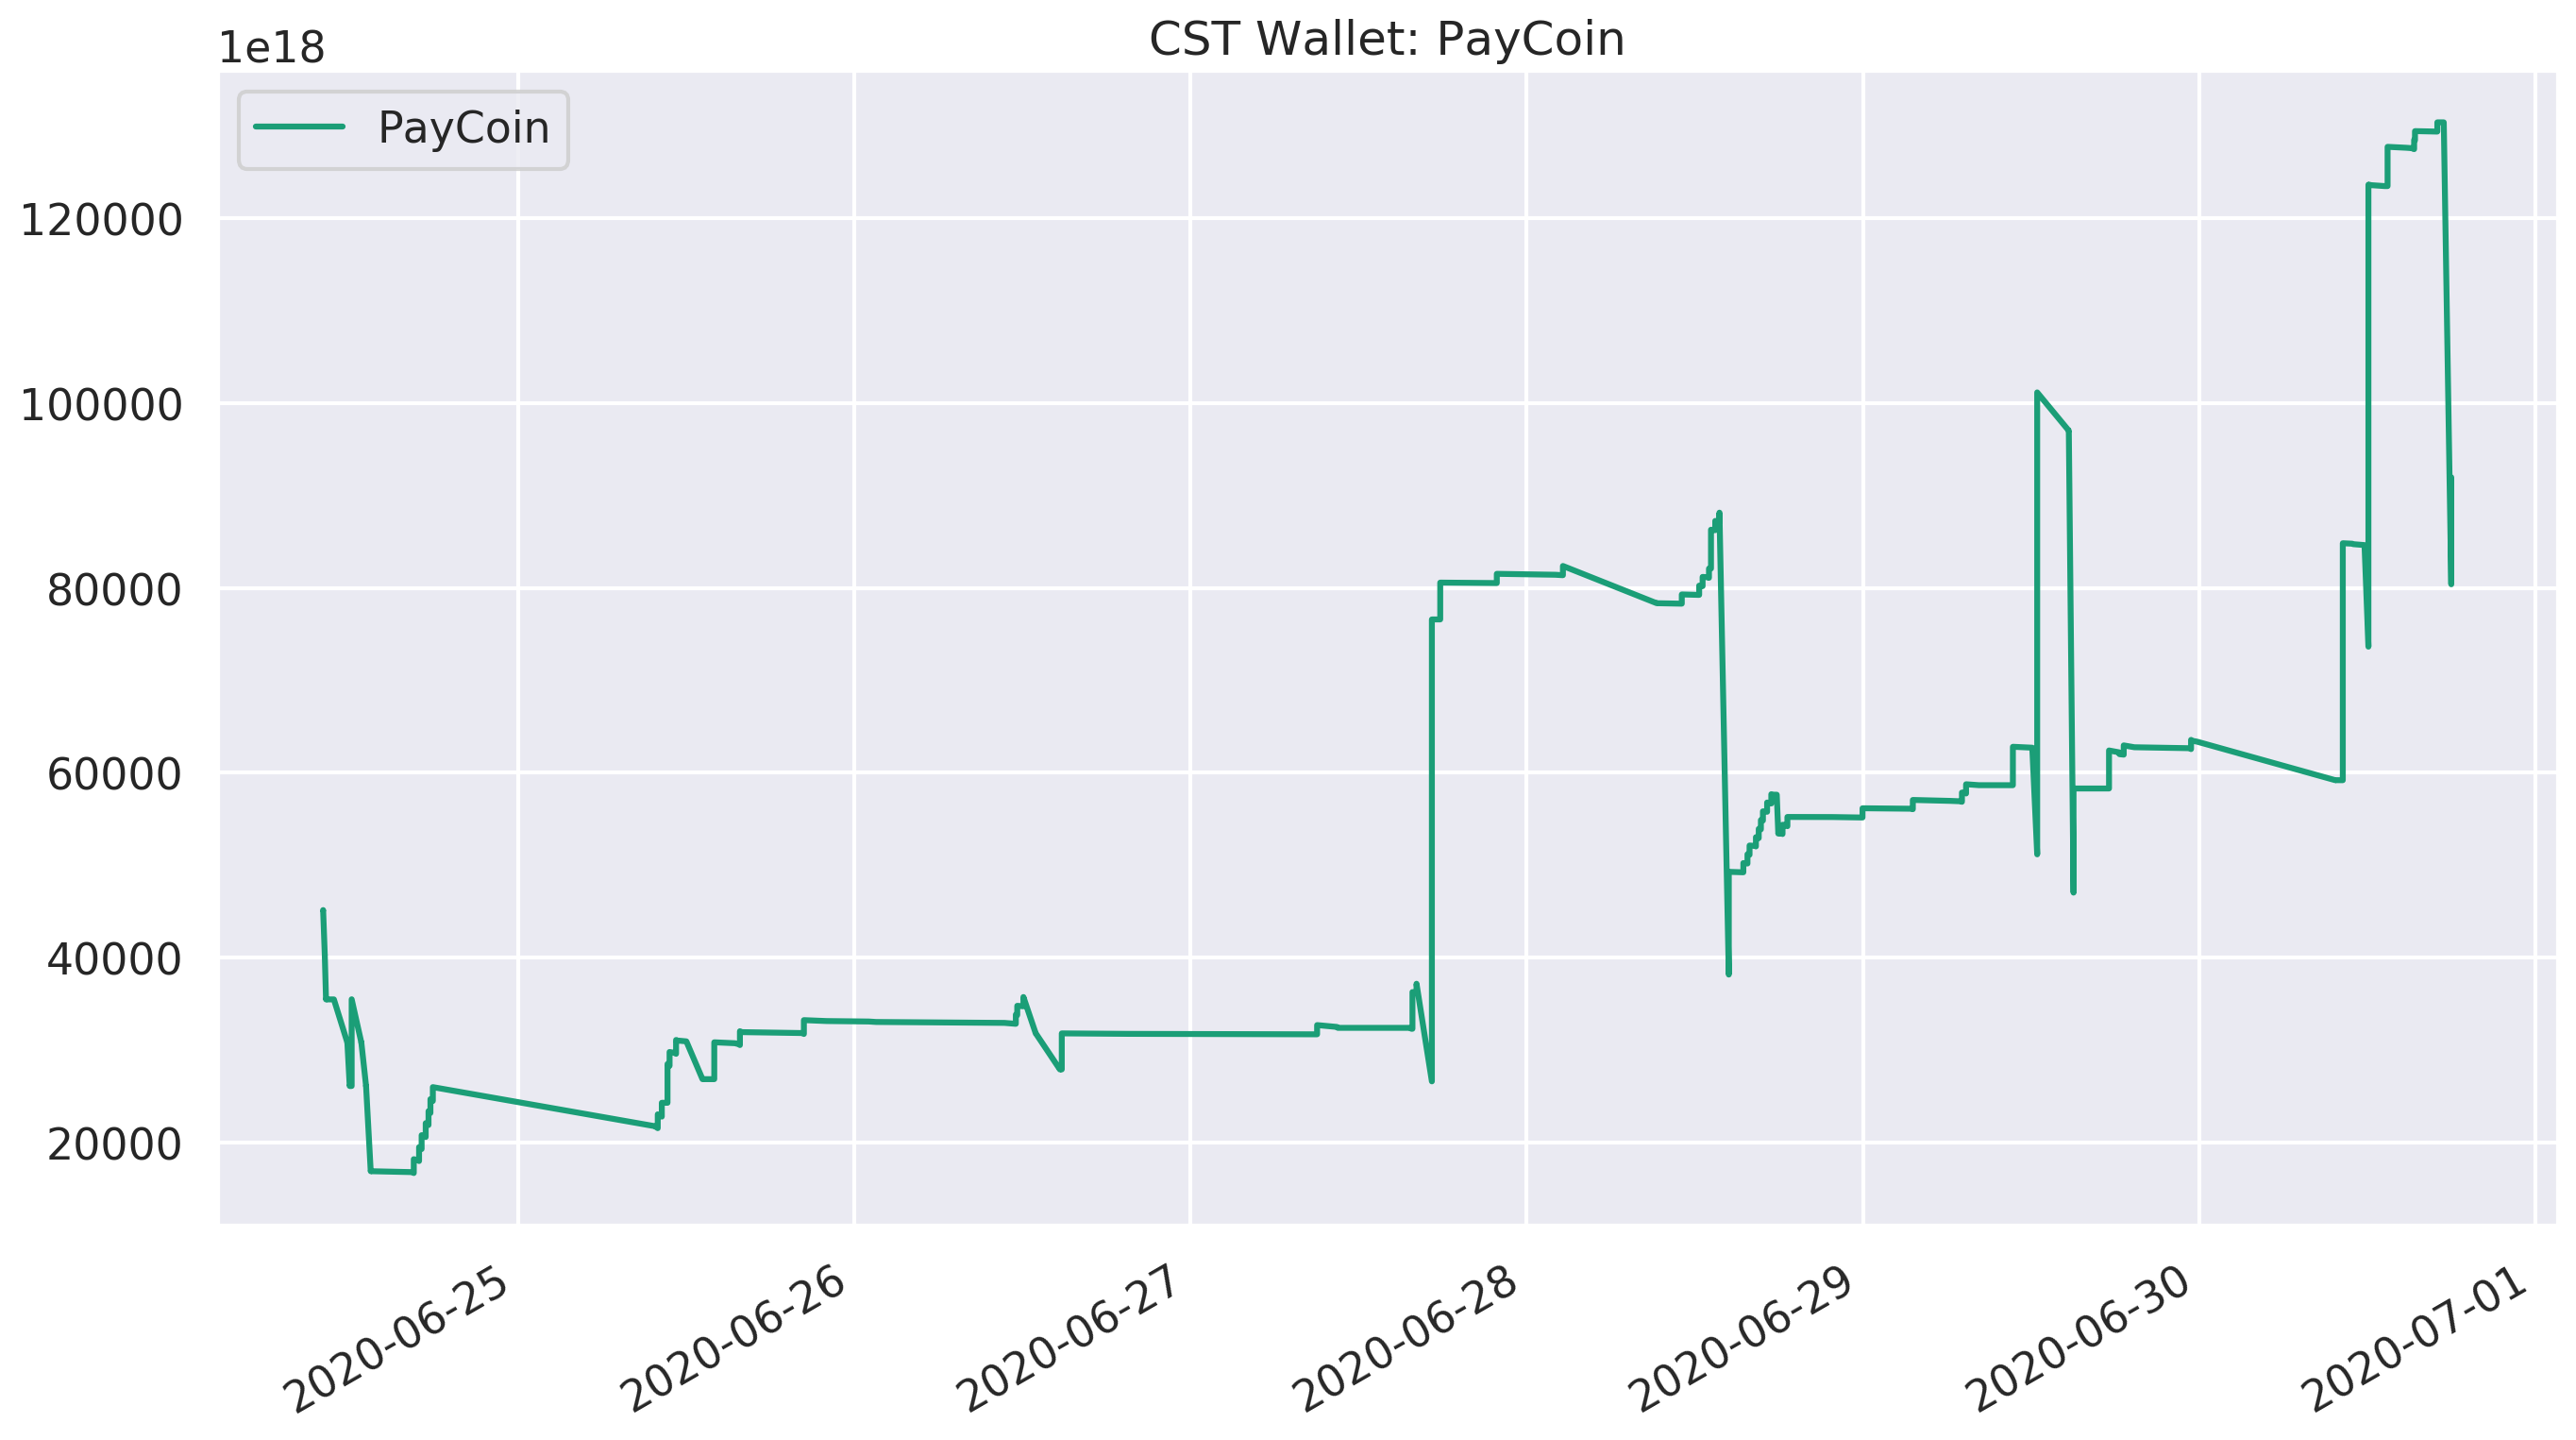

In [12]:
start_date = '2020-06-24 09:00:00'
end_date = '2020-06-30 18:00:00'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_pcCST_wallet.loc[start_date:end_date, :].index, df_pcCST_wallet.loc[start_date:end_date, 'PayCoin'], label='PayCoin')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenCST'], label = 'TokenCST')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenAA'], label = 'TokenAA')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'Total Value'], label = 'Total Value')

ax.legend(loc='best')
ax.set_title('CST Wallet: PayCoin')
#ax.set_ylabel('Price in PaC')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.ticklabel_format( axis='y', style='sci', scilimits=(18,18), useOffset=None, useLocale=None, useMathText=None)
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

In [13]:
with open('../pyscripts/abi/token_exchange.json') as json_file: 
    exchange_FSS_abi = json.load(json_file)
exchange_FSS = Contract.from_abi('ExchangeFSS', address="0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110", abi= exchange_FSS_abi)
web3_exchange_FSS = web3.eth.contract(abi=exchange_FSS_abi, address='0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110')

In [14]:
buy_sign = web3.keccak(text="Buy(address,uint256,uint256)").hex()
sell_sign = web3.keccak(text="Sell(address,uint256,uint256)").hex()

In [15]:
all_buys_FSS = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': exchange_FSS.address, 'topics': [buy_sign]})
all_sell_FSS = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': exchange_FSS.address, 'topics': [sell_sign]})

In [16]:
buy_FSS_logs = [] 
for event_data in all_buys_FSS: 
        #print(event_data)
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        #events = ['Buy', 'Sell']
        buy_FSS_logs.append(web3_exchange_FSS.events.Buy().processReceipt(receipt))

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfa\x88\xabq7\xc1\xbe\xe8\xa6\x19\x83\x16\x99\xe0H\xbeD\xb6M\xe8\xbf-\x9d\x84\x0br\xb6]\x0c\xe4:{' and logIndex: 26 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfa\x88\xabq7\xc1\xbe\xe8\xa6\x19\x83\x16\x99\xe0H\xbeD\xb6M\xe8\xbf-\x9d\x84\x0br\xb6]\x0c\xe4:{' and logIndex: 27 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/p

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf6n\x00z*w\x9b\x90\xab\x1d\x7f\x8d\xd4\x80\xa0\xd7\xa8\xef\x9fx\xcd\xcd\xd11brbL$\xd8sy' and logIndex: 0 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf6n\x00z*w\x9b\x90\xab\x1d\x7f\x8d\xd4\x80\xa0\xd7\xa8\xef\x9fx\xcd\xcd\xd11brbL$\xd8sy' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packag

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xec\xc3\x9b\x16x\xef$\xfd\xc9b\x9enm3\xf6`\xdd\xba8=\xff\xc7\x1b\xc9\x01\x81\x90\x9a\x9e\xd9-\xb1' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xec\xc3\x9b\x16x\xef$\xfd\xc9b\x9enm3\xf6`\xdd\xba8=\xff\xc7\x1b\xc9\x01\x81\x90\x9a\x9e\xd9-\xb1' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/pyt

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x9a:\xae\\N|s\xb0Q\xd1uW\xa9Uw\xcdV\xc8g\x99\x90l\x0f\x81\x81\xb1\x03Z\x98\xb2\xac\xb0' and logIndex: 12 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x9a:\xae\\N|s\xb0Q\xd1uW\xa9Uw\xcdV\xc8g\x99\x90l\x0f\x81\x81\xb1\x03Z\x98\xb2\xac\xb0' and logIndex: 13 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages

In [17]:
CST_buy_FSS = []
for i in range(0, len(buy_FSS_logs)): 
    for j in range(0, len(buy_FSS_logs[i])):
        if(buy_FSS_logs[i][j]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
            appo = buy_FSS_logs[i][j]
            for c in range(0, len(CST_buy_FSS)): 
                if(appo == CST_buy_FSS[c]): 
                    rep += 1
            if(rep == 0): 
                CST_buy_FSS.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

In [18]:
CST_buy_FSS

[AttributeDict({'args': AttributeDict({'buyer': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'amount': 1000000000000000000,
   'price': 4850500000000000916000}),
  'event': 'Buy',
  'logIndex': 29,
  'transactionIndex': 31,
  'transactionHash': HexBytes('0xfa88ab7137c1bee8a619831699e048be44b64de8bf2d9d840b72b65d0ce43a7b'),
  'address': '0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110',
  'blockHash': HexBytes('0xdb3978cc92e3c11a6c7be546e5509b25cf756883fd0f33919bccaa0674ff62c0'),
  'blockNumber': 8158668}),
 AttributeDict({'args': AttributeDict({'buyer': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'amount': 1000000000000000000,
   'price': 4850500000000000916000}),
  'event': 'Buy',
  'logIndex': 4,
  'transactionIndex': 1,
  'transactionHash': HexBytes('0x26942e6d9e997b3afaeff9e5c521e4aa3eba36bfba9cb560e17846598ffc3c9d'),
  'address': '0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110',
  'blockHash': HexBytes('0x3a6da6f68239174a4a7f37be8f58e6b82f7e2ffc287ea404bbdb955275815d43'),
  'block

In [19]:
tkFSS_Mint_CST_wallet = []
dates_tkFSS_Mint_CST = []
for i in range(0, len(CST_buy_FSS)): 
    blkNumber = CST_buy_FSS[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_tkFSS_Mint_CST.append(date)
    #if(tokenFSS_Transfer_CST[i]['args']['from'] == '0x0000000000000000000000000000000000000000' and tokenFSS_Transfer_CST[i]['args']['to'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
    #    tkFSS_CST_wallet.append(tokenFSS_Transfer_CST[i]['args']['value'] )
    if(CST_buy_FSS[i]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
        tkFSS_Mint_CST_wallet.append(CST_buy_FSS[i]['args']['amount'] )   

In [20]:
tkFSS_Mint_CST_wallet

[1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000,
 1000000000000000000]

In [21]:
dates_tkFSS_Mint_CST

[datetime.datetime(2020, 6, 24, 10, 6, 36),
 datetime.datetime(2020, 6, 24, 10, 13, 39),
 datetime.datetime(2020, 6, 24, 10, 18, 59),
 datetime.datetime(2020, 6, 24, 10, 52, 43),
 datetime.datetime(2020, 6, 24, 11, 50, 21),
 datetime.datetime(2020, 6, 24, 12, 0, 22),
 datetime.datetime(2020, 6, 24, 12, 50, 20),
 datetime.datetime(2020, 6, 24, 13, 10, 24),
 datetime.datetime(2020, 6, 24, 13, 20, 21),
 datetime.datetime(2020, 6, 24, 13, 30, 23),
 datetime.datetime(2020, 6, 25, 9, 50, 37),
 datetime.datetime(2020, 6, 25, 13, 10, 57),
 datetime.datetime(2020, 6, 26, 12, 57, 29),
 datetime.datetime(2020, 6, 26, 14, 41, 18),
 datetime.datetime(2020, 6, 28, 9, 16, 51),
 datetime.datetime(2020, 6, 28, 17, 57, 20),
 datetime.datetime(2020, 6, 29, 14, 41, 17),
 datetime.datetime(2020, 6, 30, 9, 41, 37)]

In [22]:
sell_FSS_logs = [] 
for event_data in all_sell_FSS: 
        #print(event_data)
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        #events = ['Buy', 'Sell']
        sell_FSS_logs.append(web3_exchange_FSS.events.Sell().processReceipt(receipt))

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd7\x17\xf0(\xa2\xf1 \x93\x84\t\xd2a\x06\xc4\x93\x16\xdd\xbbS~\xa3\x8f\xb4\xe0\x9b\\\xbf\xfc\x1b\x0fi\x1c' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd7\x17\xf0(\xa2\xf1 \x93\x84\t\xd2a\x06\xc4\x93\x16\xdd\xbbS~\xa3\x8f\xb4\xe0\x9b\\\xbf\xfc\x1b\x0fi\x1c' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/bl

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"\xc1'\x80f\xccM7m\x1c\xd5\n\x16\x049\x15\xa2J.\xb5\xfaA\x04K\xed\x83\x13@i2\xbcUp" and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"\xc1'\x80f\xccM7m\x1c\xd5\n\x16\x049\x15\xa2J.\xb5\xfaA\x04K\xed\x83\x13@i2\xbcUp" and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract

In [23]:
CST_sell_FSS = []
for i in range(0, len(sell_FSS_logs)): 
    for j in range(0, len(sell_FSS_logs[i])):
        if(sell_FSS_logs[i][j]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
            appo = sell_FSS_logs[i][j]
            for c in range(0, len(CST_sell_FSS)): 
                if(appo == CST_sell_FSS[c]): 
                    rep += 1
            if(rep == 0): 
                CST_sell_FSS.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

In [24]:
sell_FSS_logs

[(AttributeDict({'args': AttributeDict({'buyer': '0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110',
    'amount': 2000000000000000000,
    'price': 4693500000000000916000}),
   'event': 'Sell',
   'logIndex': 6,
   'transactionIndex': 2,
   'transactionHash': HexBytes('0xd717f028a2f120938409d26106c49316ddbb537ea38fb4e09b5cbffc1b0f691c'),
   'address': '0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110',
   'blockHash': HexBytes('0xc7b34d62a55c3d7db4655d6fe28d43b1d29be77300dc76ae358981679e3064f7'),
   'blockNumber': 8159336}),),
 (AttributeDict({'args': AttributeDict({'buyer': '0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110',
    'amount': 1000000000000000000,
    'price': 4198400000000000545900}),
   'event': 'Sell',
   'logIndex': 18,
   'transactionIndex': 17,
   'transactionHash': HexBytes('0xd2e4a3c5776bf2ccc9c10bf58d295ea1c8a0c07b14d0ba8ebd8c08935deb7745'),
   'address': '0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110',
   'blockHash': HexBytes('0x5e80e01fb445e93655a2fecf47063acaa0c3c2a6d1a8dcc0a828d

In [25]:
all_tokenFSSTransfer_logs = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': token_FSS.address, 'topics': [transfer_erc20]})
%store all_tokenFSSTransfer_logs

Stored 'all_tokenFSSTransfer_logs' (list)


In [26]:
tokenFSS_Transfer_logs = [] 
for event_data in all_tokenFSSTransfer_logs: 
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        tokenFSS_Transfer_logs.append(web3_token_FSS.events.Transfer().processReceipt(receipt))
%store tokenFSS_Transfer_logs

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfa\x88\xabq7\xc1\xbe\xe8\xa6\x19\x83\x16\x99\xe0H\xbeD\xb6M\xe8\xbf-\x9d\x84\x0br\xb6]\x0c\xe4:{' and logIndex: 29 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'&\x94.m\x9e\x99{:\xfa\xef\xf9\xe5\xc5!\xe4\xaa>\xba6\xbf\xba\x9c\xb5`\xe1xFY\x8f\xfc<\x9d' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/s

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xaa\xfa6-Y\xc6b\xf6\xecL\xf0^\xacM\xab\xbc\xd9\xd0\xb2\x1a\xda\xd0\r\xb1\xba\x9b\xa5\xbb:.\x14\xd2' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x89\x11\xb4tq\xa6\xab\xf6a=\xf6Z=\x11\xcf\xd8v\x0f\x1c#c)iJ\xa9L\x18\xcdnrm\xef' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packa

Stored 'tokenFSS_Transfer_logs' (list)


/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x11b\xd3c\xdd\x1e\xfb\xf1\x03\x86pi\xf5h\xa3\\O#\xf1\x06\xe4\x82\x81&W\xa5\xa5\x0f\xc3\xdd\xccc' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "


In [27]:
tokenFSS_Burn_CST = []
for i in range(0, len(tokenFSS_Transfer_logs)):
    for j in range(0, len(tokenFSS_Transfer_logs[i])): 
        if(tokenFSS_Transfer_logs[i][j]['args']['from'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F' and tokenFSS_Transfer_logs[i][j]['args']['to'] == '0x0000000000000000000000000000000000000000'):
            appo = tokenFSS_Transfer_logs[i][j]
            for c in range(0, len(tokenFSS_Burn_CST)): 
                if(appo == tokenFSS_Burn_CST[c]): 
                    rep += 1
            if(rep == 0): 
                tokenFSS_Burn_CST.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

In [28]:
tokenFSS_Burn_CST

[AttributeDict({'args': AttributeDict({'from': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'to': '0x0000000000000000000000000000000000000000',
   'value': 2000000000000000000}),
  'event': 'Transfer',
  'logIndex': 3,
  'transactionIndex': 2,
  'transactionHash': HexBytes('0xd717f028a2f120938409d26106c49316ddbb537ea38fb4e09b5cbffc1b0f691c'),
  'address': '0xFBDE8b1b7F1F513a1a61b63f285348Da22CbfF2f',
  'blockHash': HexBytes('0xc7b34d62a55c3d7db4655d6fe28d43b1d29be77300dc76ae358981679e3064f7'),
  'blockNumber': 8159336}),
 AttributeDict({'args': AttributeDict({'from': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'to': '0x0000000000000000000000000000000000000000',
   'value': 1000000000000000000}),
  'event': 'Transfer',
  'logIndex': 15,
  'transactionIndex': 17,
  'transactionHash': HexBytes('0xd2e4a3c5776bf2ccc9c10bf58d295ea1c8a0c07b14d0ba8ebd8c08935deb7745'),
  'address': '0xFBDE8b1b7F1F513a1a61b63f285348Da22CbfF2f',
  'blockHash': HexBytes('0x5e80e01fb445e93655a2fecf47063aca

In [29]:
tkFSS_Burn_CST_wallet = []
dates_tkFSS_Burn_CST = []
for i in range(0, len(tokenFSS_Burn_CST)): 
    blkNumber = tokenFSS_Burn_CST[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_tkFSS_Burn_CST.append(date)
    #if(tokenFSS_Transfer_CST[i]['args']['from'] == '0x0000000000000000000000000000000000000000' and tokenFSS_Transfer_CST[i]['args']['to'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
    #    tkFSS_CST_wallet.append(tokenFSS_Transfer_CST[i]['args']['value'] )
    if(tokenFSS_Burn_CST[i]['args']['from'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F' and tokenFSS_Burn_CST[i]['args']['to'] == '0x0000000000000000000000000000000000000000'): 
        tkFSS_Burn_CST_wallet.append(-tokenFSS_Burn_CST[i]['args']['value'] )   

In [30]:
tkFSS_Burn_CST_wallet

[-2000000000000000000,
 -1000000000000000000,
 -1000000000000000000,
 -1000000000000000000,
 -1000000000000000000,
 -1000000000000000000,
 -1000000000000000000,
 -1000000000000000000,
 -1000000000000000000,
 -6000000000000000000,
 -1000000000000000000,
 -1]

In [31]:
dates_tkFSS_Burn_CST

[datetime.datetime(2020, 6, 24, 12, 8, 47),
 datetime.datetime(2020, 6, 25, 10, 41, 14),
 datetime.datetime(2020, 6, 25, 14, 1, 21),
 datetime.datetime(2020, 6, 26, 14, 49, 20),
 datetime.datetime(2020, 6, 27, 15, 50, 53),
 datetime.datetime(2020, 6, 27, 17, 49, 47),
 datetime.datetime(2020, 6, 28, 13, 9, 10),
 datetime.datetime(2020, 6, 29, 10, 41, 50),
 datetime.datetime(2020, 6, 29, 17, 33, 28),
 datetime.datetime(2020, 6, 30, 10, 14, 27),
 datetime.datetime(2020, 6, 30, 13, 26, 13),
 datetime.datetime(2020, 6, 30, 17, 26, 49)]

In [32]:
df_tkFSS_Mint_CST_wallet = pd.DataFrame(tkFSS_Mint_CST_wallet, index = dates_tkFSS_Mint_CST, columns = ['TokenFSS'])
df_tkFSS_Mint_CST_wallet

,TokenFSS
2020-06-24 10:06:36,1000000000000000000
2020-06-24 10:13:39,1000000000000000000
2020-06-24 10:18:59,1000000000000000000
2020-06-24 10:52:43,1
2020-06-24 11:50:21,1000000000000000000
2020-06-24 12:00:22,1000000000000000000
2020-06-24 12:50:20,1000000000000000000
2020-06-24 13:10:24,1000000000000000000
2020-06-24 13:20:21,1000000000000000000
2020-06-24 13:30:23,1000000000000000000


In [33]:
df_tkFSS_Burn_CST_wallet = pd.DataFrame(tkFSS_Burn_CST_wallet, index = dates_tkFSS_Burn_CST, columns = ['TokenFSS'])
df_tkFSS_Burn_CST_wallet

,TokenFSS
2020-06-24 12:08:47,-2000000000000000000
2020-06-25 10:41:14,-1000000000000000000
2020-06-25 14:01:21,-1000000000000000000
2020-06-26 14:49:20,-1000000000000000000
2020-06-27 15:50:53,-1000000000000000000
2020-06-27 17:49:47,-1000000000000000000
2020-06-28 13:09:10,-1000000000000000000
2020-06-29 10:41:50,-1000000000000000000
2020-06-29 17:33:28,-1000000000000000000
2020-06-30 10:14:27,-6000000000000000000


In [34]:
df_tkFSS_CST_wallet = pd.concat([df_tkFSS_Mint_CST_wallet, df_tkFSS_Burn_CST_wallet])
df_tkFSS_CST_wallet.sort_index(inplace=True)
df_tkFSS_CST_wallet

,TokenFSS
2020-06-24 10:06:36,1000000000000000000
2020-06-24 10:13:39,1000000000000000000
2020-06-24 10:18:59,1000000000000000000
2020-06-24 10:52:43,1
2020-06-24 11:50:21,1000000000000000000
2020-06-24 12:00:22,1000000000000000000
2020-06-24 12:08:47,-2000000000000000000
2020-06-24 12:50:20,1000000000000000000
2020-06-24 13:10:24,1000000000000000000
2020-06-24 13:20:21,1000000000000000000


In [35]:
df_tkFSS_CST_wallet = df_tkFSS_CST_wallet.cumsum()
df_tkFSS_CST_wallet

,TokenFSS
2020-06-24 10:06:36,1000000000000000000
2020-06-24 10:13:39,2000000000000000000
2020-06-24 10:18:59,3000000000000000000
2020-06-24 10:52:43,3000000000000000001
2020-06-24 11:50:21,4000000000000000001
2020-06-24 12:00:22,5000000000000000001
2020-06-24 12:08:47,3000000000000000001
2020-06-24 12:50:20,4000000000000000001
2020-06-24 13:10:24,5000000000000000001
2020-06-24 13:20:21,6000000000000000001


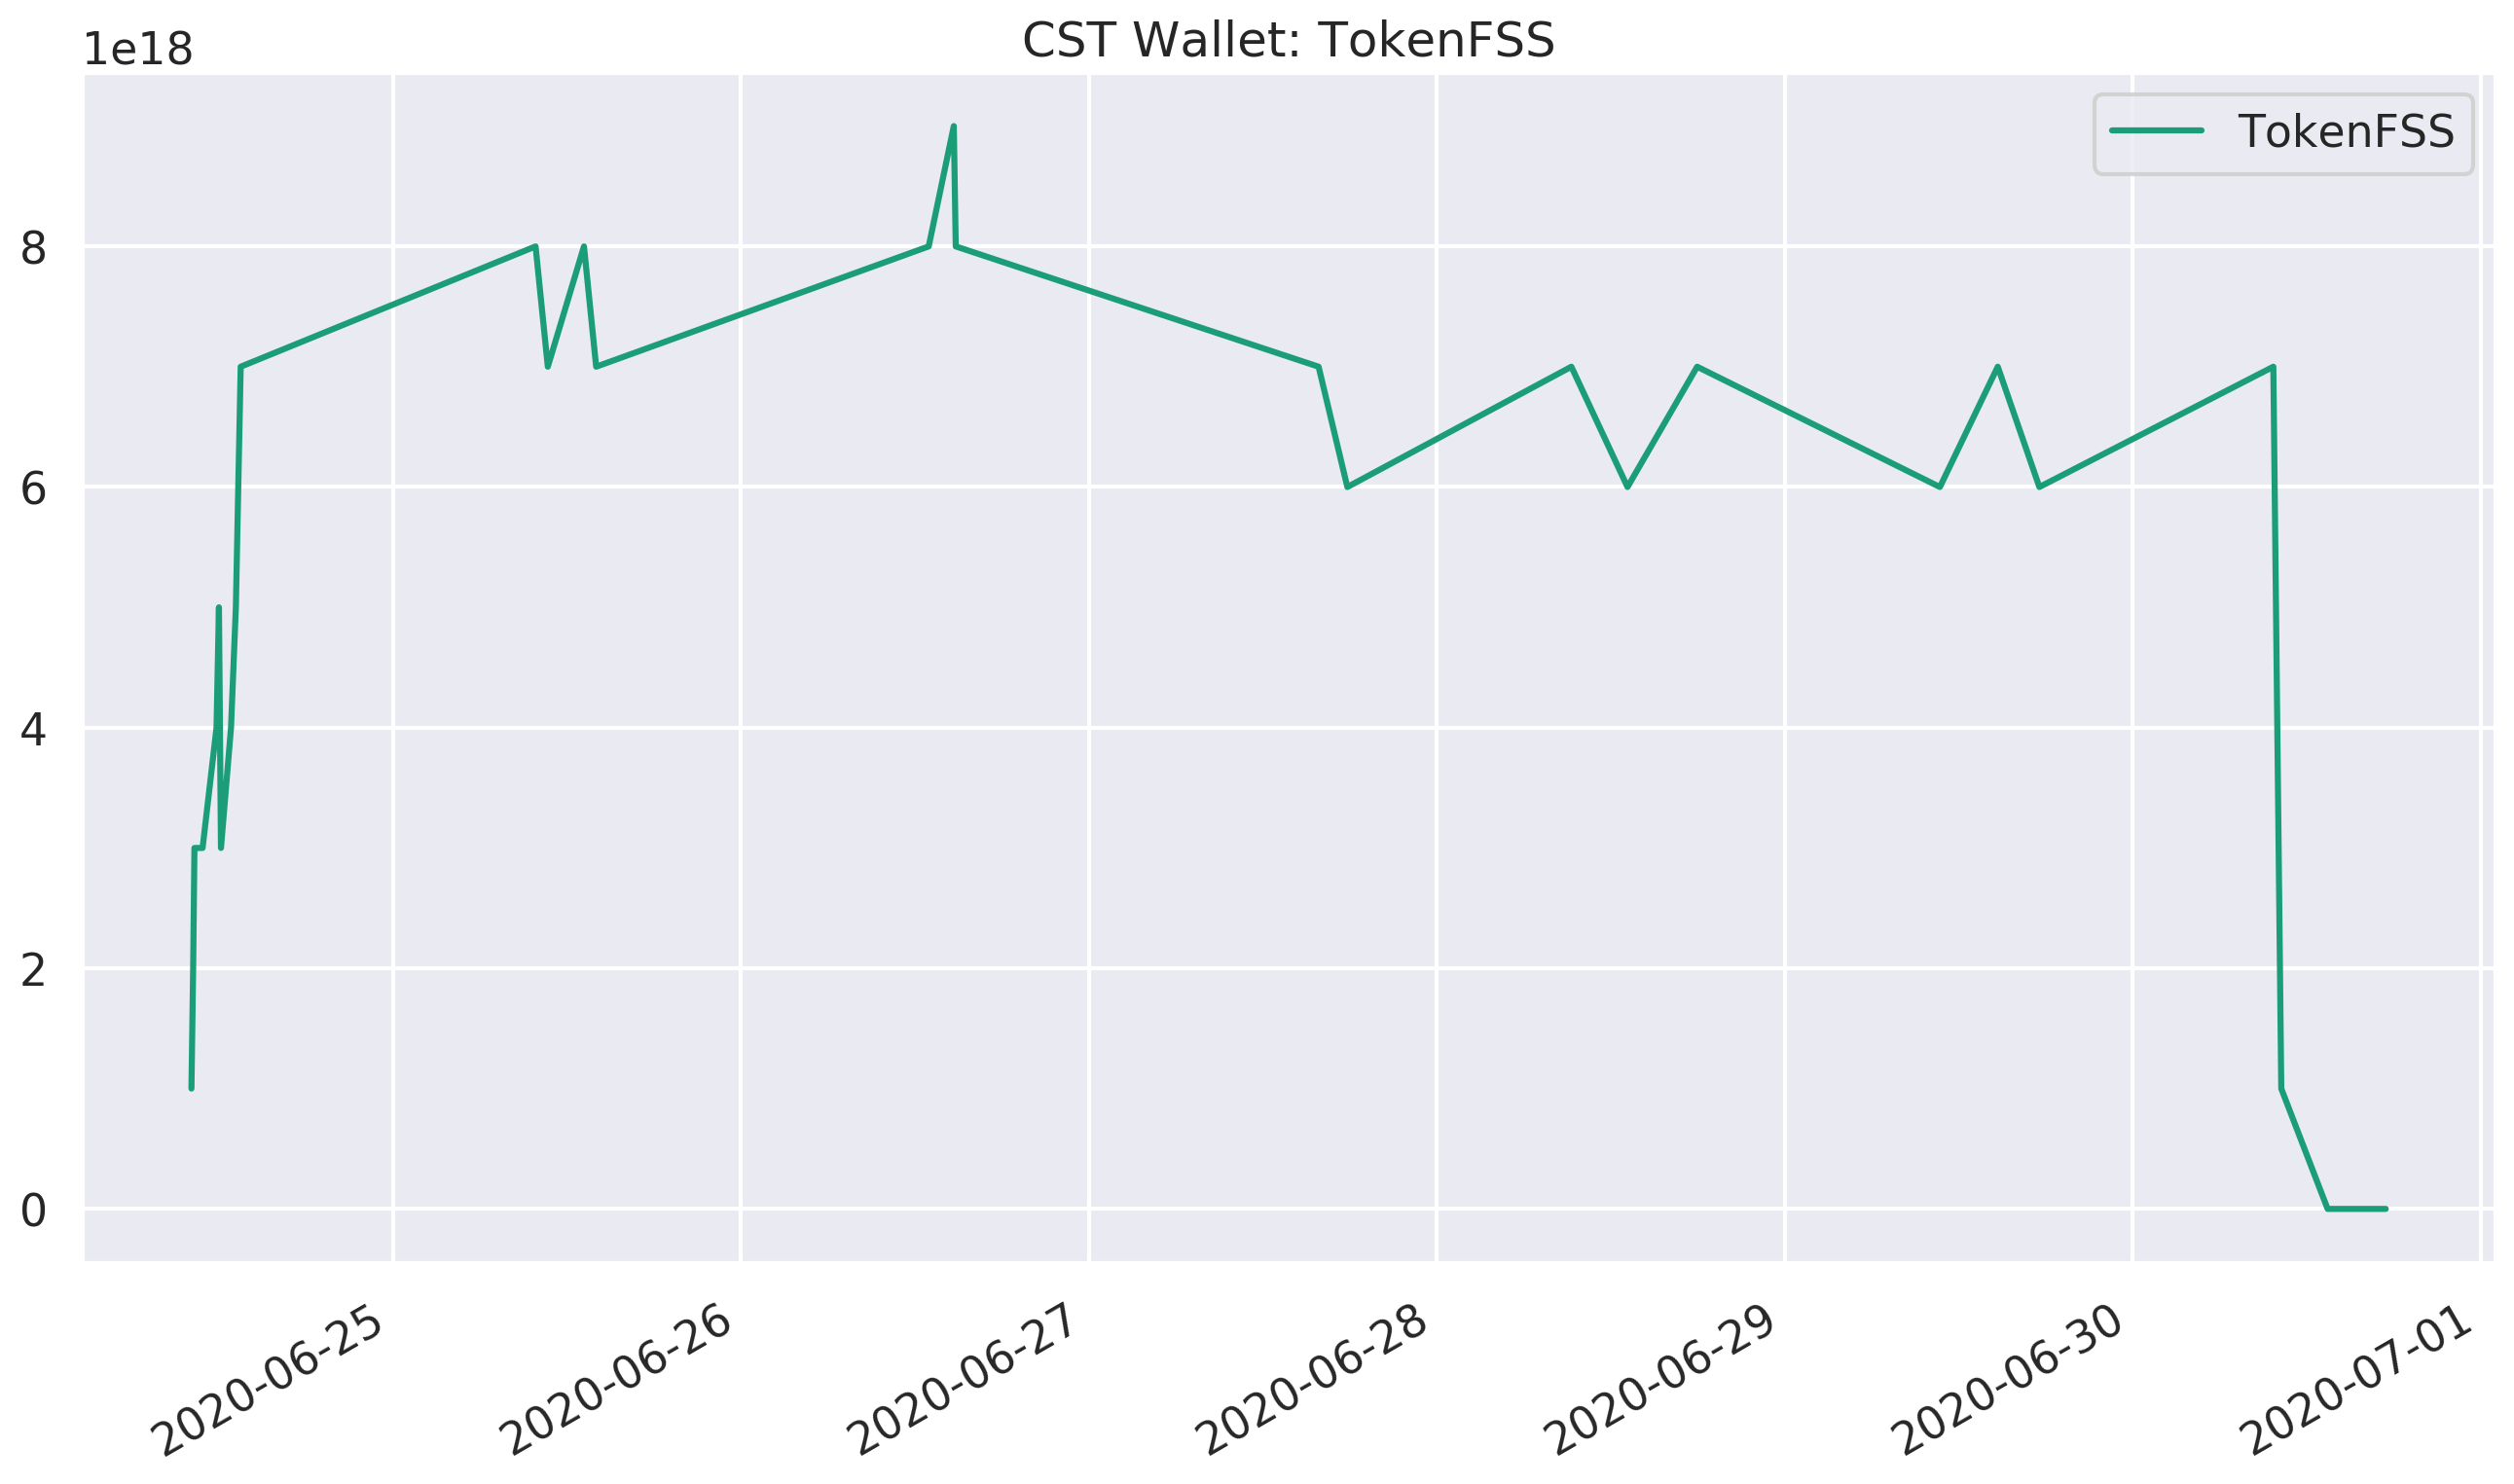

In [36]:
start_date = '2020-06-24 09:00:00'
end_date = '2020-06-30 18:00:00'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_tkFSS_CST_wallet.loc[start_date:end_date, :].index, df_tkFSS_CST_wallet.loc[start_date:end_date, 'TokenFSS'], label='TokenFSS')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenCST'], label = 'TokenCST')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenAA'], label = 'TokenAA')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'Total Value'], label = 'Total Value')

ax.legend(loc='best')
ax.set_title('CST Wallet: TokenFSS')
#ax.set_ylabel('Price in PaC')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.ticklabel_format( axis='y', style='sci', scilimits=(18,18), useOffset=None, useLocale=None, useMathText=None)
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

In [37]:
with open('../../blockchain_course_unimi/challenge/teamAA/abi/real/exchange.json') as json_file: 
    exchange_AA_abi = json.load(json_file)
exchange_AA = Contract.from_abi('ExchangeAA', address='0xA4b9d6A91867EAB4dDa837344a34b524F3cCB678', abi=exchange_AA_abi)
web3_exchange_AA = web3.eth.contract(abi=exchange_AA_abi, address='0xA4b9d6A91867EAB4dDa837344a34b524F3cCB678')

In [38]:
all_buys_AA = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': exchange_AA.address, 'topics': [buy_sign]})
all_sell_AA = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': exchange_AA.address, 'topics': [sell_sign]})

In [39]:
buy_AA_logs = [] 
for event_data in all_buys_AA: 
        #print(event_data)
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        #events = ['Buy', 'Sell']
        buy_AA_logs.append(web3_exchange_AA.events.Buy().processReceipt(receipt))

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xeaz\x11\xd4\xe2 v\n\xebv\xf4ZwG0d\xc3\xcf~*\x8c\x9c\xbcR)\xf7\x16\xa2\xa5\x1e\xc8v' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xeaz\x11\xd4\xe2 v\n\xebv\xf4ZwG0d\xc3\xcf~*\x8c\x9c\xbcR)\xf7\x16\xa2\xa5\x1e\xc8v' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/co

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd31\xfc\xb7\xeb\x16^\x82\xf1\xde\xf2n\xde9N5\xfc\xfa\xe6\t\xf7\x99\xf8v\xebYq\x8b\xe9\x08\xef\xde' and logIndex: 39 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd31\xfc\xb7\xeb\x16^\x82\xf1\xde\xf2n\xde9N5\xfc\xfa\xe6\t\xf7\x99\xf8v\xebYq\x8b\xe9\x08\xef\xde' and logIndex: 40 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib

In [40]:
CST_buy_AA = []
for i in range(0, len(buy_AA_logs)): 
    for j in range(0, len(buy_AA_logs[i])):
        if(buy_AA_logs[i][j]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
            appo = buy_AA_logs[i][j]
            for c in range(0, len(CST_buy_AA)): 
                if(appo == CST_buy_AA[c]): 
                    rep += 1
            if(rep == 0): 
                CST_buy_AA.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

In [41]:
CST_buy_AA

[AttributeDict({'args': AttributeDict({'buyer': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'amount': 1000000000000000000,
   'price': 205210000000000000}),
  'event': 'Buy',
  'logIndex': 3,
  'transactionIndex': 19,
  'transactionHash': HexBytes('0x22c3df9168c691bd9a6fc5d1f1ddae44081e4d020eead57dde0a436a46c0d59a'),
  'address': '0xA4b9d6A91867EAB4dDa837344a34b524F3cCB678',
  'blockHash': HexBytes('0xdfb83be5b6d664692156f32ec290a43f99810ae020395717ebca7dde5a17103b'),
  'blockNumber': 8180144}),
 AttributeDict({'args': AttributeDict({'buyer': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'amount': 50000000000000000000000,
   'price': 210639400000000000}),
  'event': 'Buy',
  'logIndex': 3,
  'transactionIndex': 0,
  'transactionHash': HexBytes('0x41bc87e27cd56ccbc552e1391518d2f13f68f5218c35fe25c304c9200daaf313'),
  'address': '0xA4b9d6A91867EAB4dDa837344a34b524F3cCB678',
  'blockHash': HexBytes('0x4b2a9b7761229aea0f1e992bfbab7dba0dc9209874cb6343150acc0073e2cf6f'),
  'blockNumbe

In [42]:
tkAA_Mint_CST_wallet = []
dates_tkAA_Mint_CST = []
for i in range(0, len(CST_buy_AA)): 
    blkNumber = CST_buy_AA[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_tkAA_Mint_CST.append(date)
    if(CST_buy_AA[i]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
        tkAA_Mint_CST_wallet.append(CST_buy_AA[i]['args']['amount'] )  

In [43]:
tkAA_Mint_CST_wallet

[1000000000000000000,
 50000000000000000000000,
 49999000000000000000000,
 50000000000000000000000,
 1000000000000000000]

In [44]:
sell_AA_logs = [] 
for event_data in all_sell_AA: 
        #print(event_data)
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        #events = ['Buy', 'Sell']
        sell_AA_logs.append(web3_exchange_AA.events.Sell().processReceipt(receipt))

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd1\xaf5\xf6T\x99\x8cSM\xdc\xcdD\x1e\xf5p,\x97\x87\x12hz\xf9\x91\xd4\x03(\x18\xe4d\xd1P\x1b' and logIndex: 9 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd1\xaf5\xf6T\x99\x8cSM\xdc\xcdD\x1e\xf5p,\x97\x87\x12hz\xf9\x91\xd4\x03(\x18\xe4d\xd1P\x1b' and logIndex: 10 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x82\x19#\x05S\xc1;\xb3^Z\x87\x0bl\xbfdz\xc2\xd6\xeb\x85\xdf\x9f\x00\x91\xd4\x0bH\xa6s@hX' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\x82\x19#\x05S\xc1;\xb3^Z\x87\x0bl\xbfdz\xc2\xd6\xeb\x85\xdf\x9f\x00\x91\xd4\x0bH\xa6s@hX' and logIndex: 7 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packag

In [45]:
CST_sell_AA = []
for i in range(0, len(sell_AA_logs)): 
    for j in range(0, len(sell_AA_logs[i])):
        if(sell_AA_logs[i][j]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
            appo = sell_AA_logs[i][j]
            for c in range(0, len(CST_sell_AA)): 
                if(appo == CST_sell_AA[c]): 
                    rep += 1
            if(rep == 0): 
                CST_sell_AA.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

In [46]:
CST_sell_AA

[AttributeDict({'args': AttributeDict({'buyer': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'amount': 50000000000000000000000,
   'price': 222862000000000000}),
  'event': 'Sell',
  'logIndex': 4,
  'transactionIndex': 3,
  'transactionHash': HexBytes('0x253ab12c0f75f6fadc6ff066e9b830f1240e7062d9e699a5dcc5346e20de23e7'),
  'address': '0xA4b9d6A91867EAB4dDa837344a34b524F3cCB678',
  'blockHash': HexBytes('0xcb311c39b872f93354dc8a8fe695efe6f3312f566a94d319c73f0d016ff9a210'),
  'blockNumber': 8185763}),
 AttributeDict({'args': AttributeDict({'buyer': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'amount': 50000000000000000000000,
   'price': 225867000000000000}),
  'event': 'Sell',
  'logIndex': 86,
  'transactionIndex': 34,
  'transactionHash': HexBytes('0x4b9bcccfa6443ecd53167543054bc8c9cf0c15d1519fc16e4ad3934a5ff30377'),
  'address': '0xA4b9d6A91867EAB4dDa837344a34b524F3cCB678',
  'blockHash': HexBytes('0x8f44244f798403cdb4f21200c42b91c42ae8a0c4926dd1ec85e45635bf630706'),
  'blo

In [47]:
tkAA_Burn_CST_wallet = []
dates_tkAA_Burn_CST = []
for i in range(0, len(CST_sell_AA)): 
    blkNumber = CST_sell_AA[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_tkAA_Burn_CST.append(date)
    if(CST_sell_AA[i]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
        tkAA_Burn_CST_wallet.append(-CST_sell_AA[i]['args']['amount'] ) 

In [48]:
tkAA_Burn_CST_wallet

[-50000000000000000000000, -50000000000000000000000, -50001000000000000000000]

In [49]:
df_tkAA_Mint_CST_wallet = pd.DataFrame(tkAA_Mint_CST_wallet, index = dates_tkAA_Mint_CST, columns = ['TokenAA'])
df_tkAA_Burn_CST_wallet = pd.DataFrame(tkAA_Burn_CST_wallet, index = dates_tkAA_Burn_CST, columns = ['TokenAA'])
df_tkAA_CST_wallet = pd.concat([df_tkAA_Mint_CST_wallet, df_tkAA_Burn_CST_wallet])
df_tkAA_CST_wallet.sort_index(inplace=True)
df_tkAA_CST_wallet = df_tkAA_CST_wallet.cumsum()
df_tkAA_CST_wallet

,TokenAA
2020-06-27 15:43:02,1000000000000000000
2020-06-27 17:14:03,50001000000000000000000
2020-06-28 14:25:25,1000000000000000000
2020-06-29 12:25:55,50000000000000000000000
2020-06-29 15:01:31,0
2020-06-30 12:04:09,50000000000000000000000
2020-06-30 12:07:58,50001000000000000000000
2020-06-30 17:58:56,0


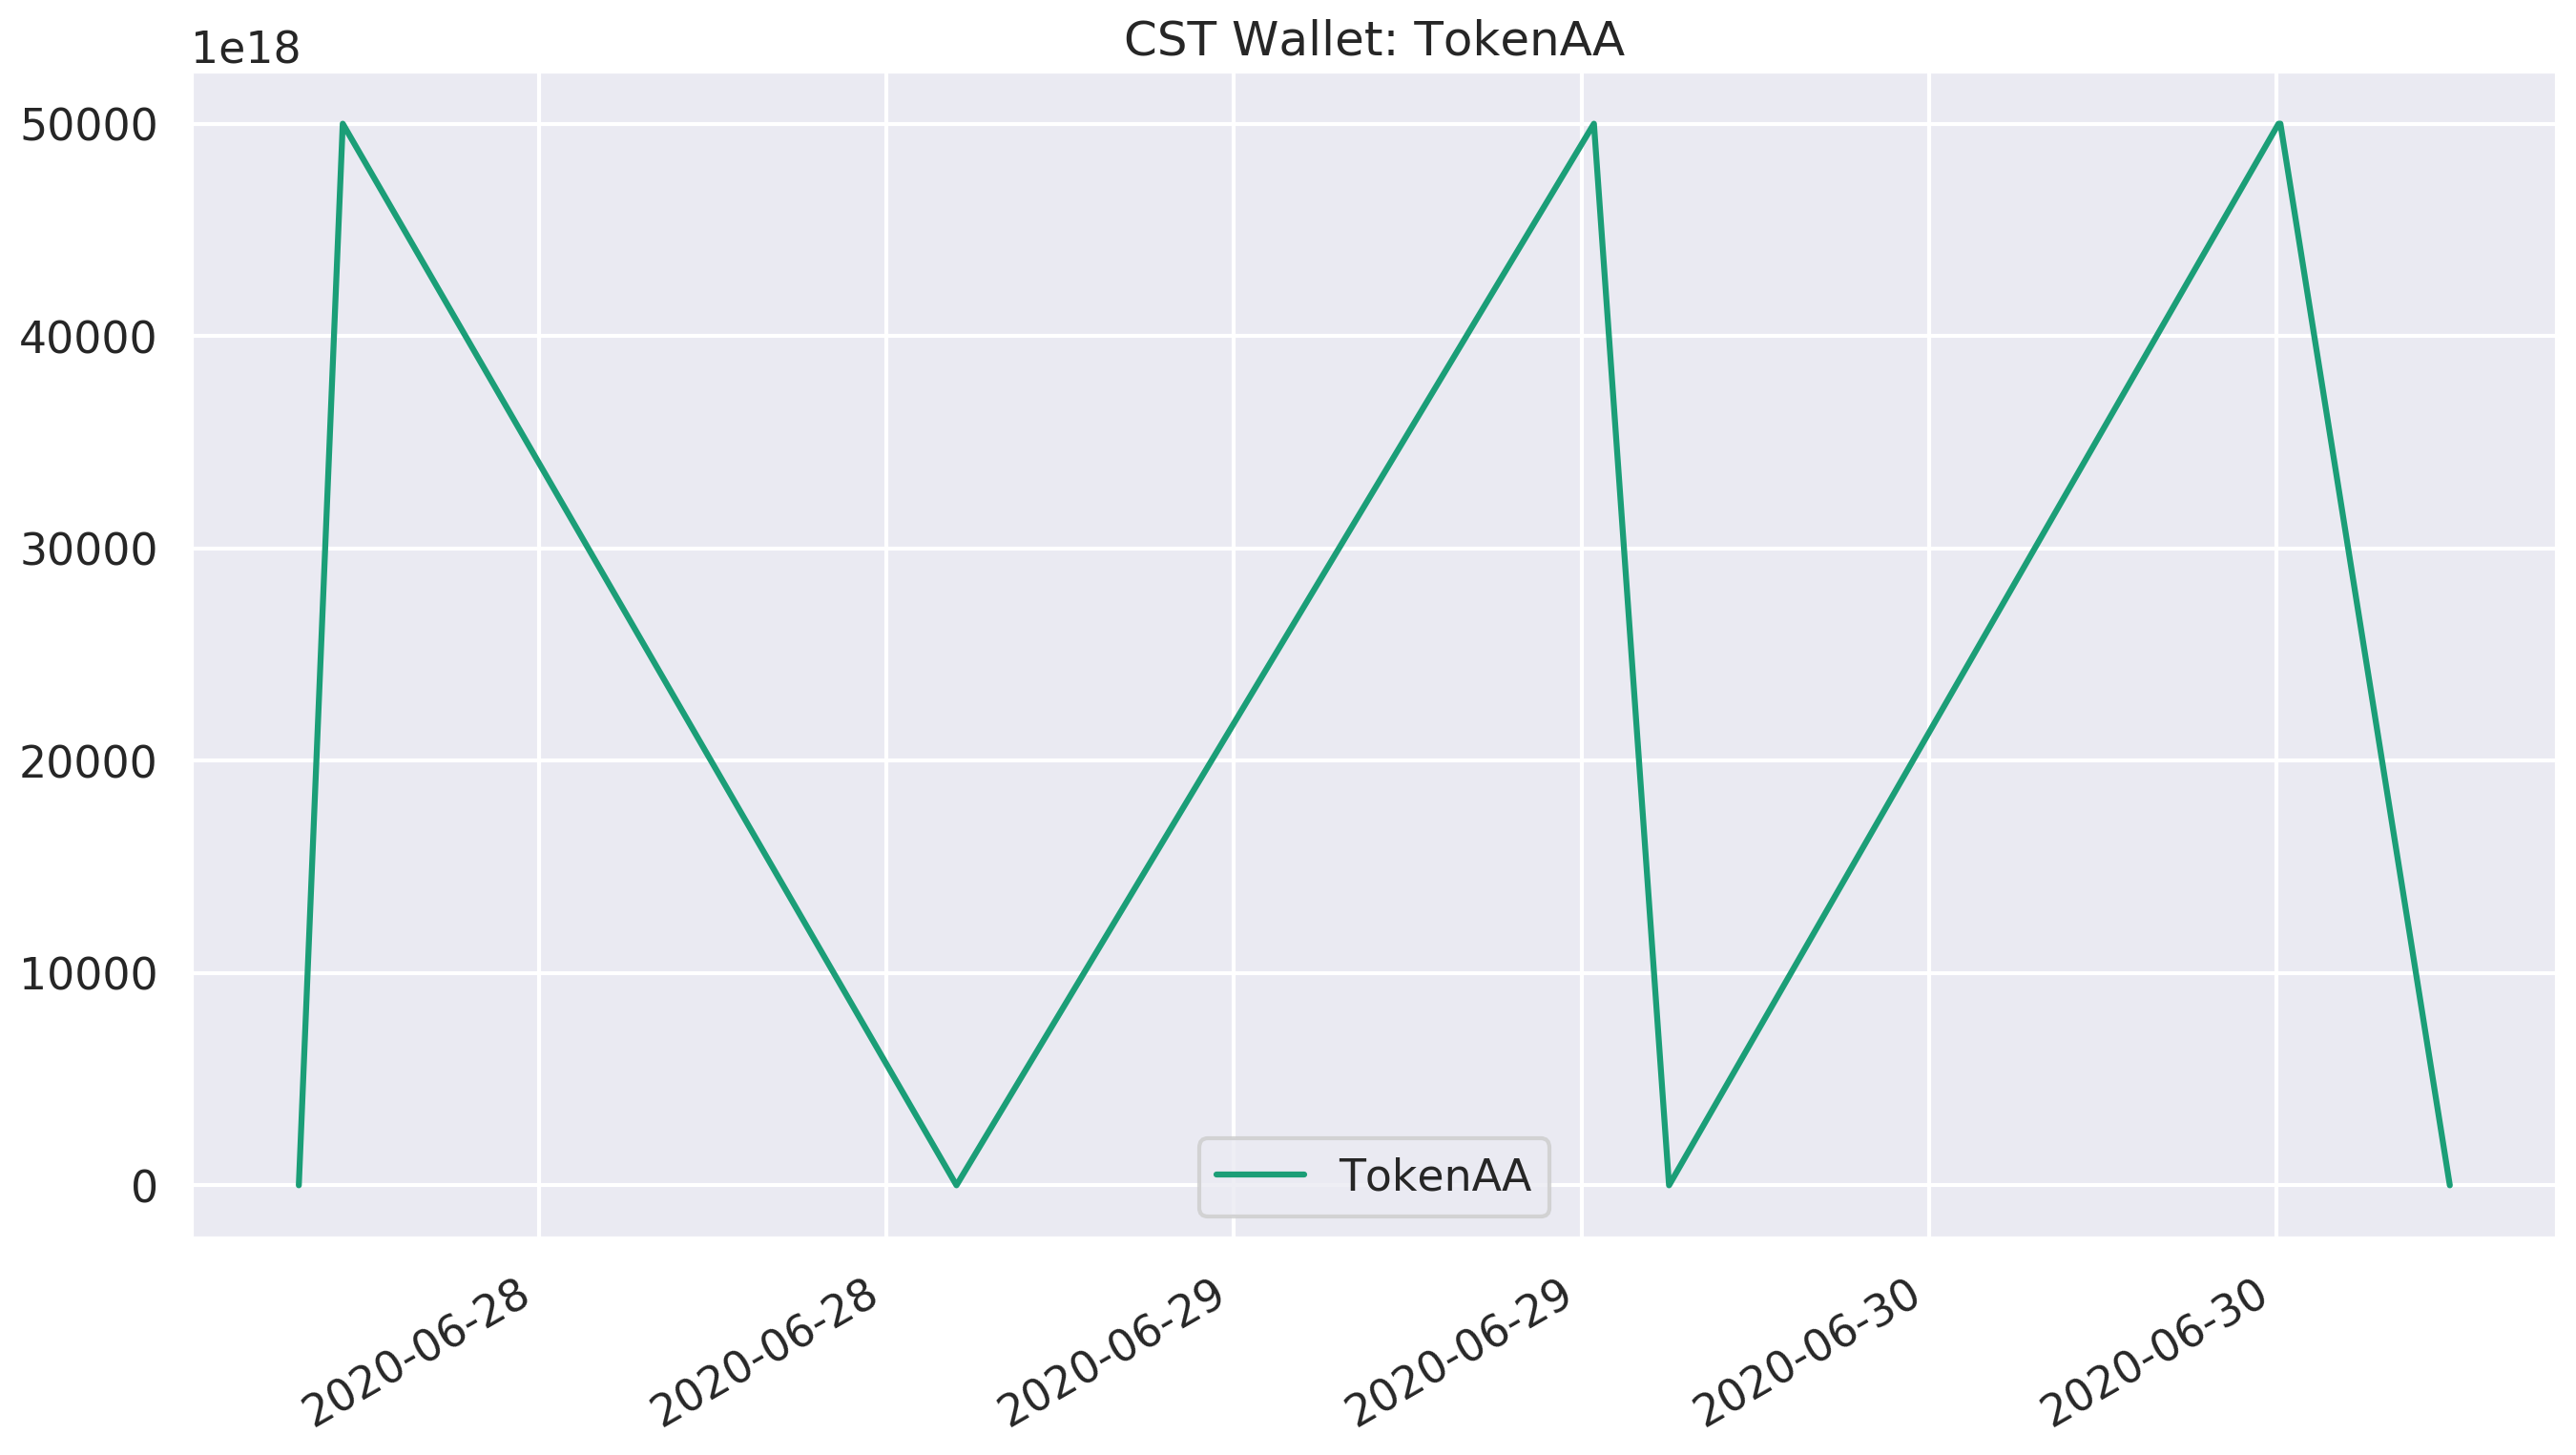

In [50]:
start_date = '2020-06-24 09:00:00'
end_date = '2020-06-30 18:00:00'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_tkAA_CST_wallet.loc[start_date:end_date, :].index, df_tkAA_CST_wallet.loc[start_date:end_date, 'TokenAA'], label='TokenAA')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenCST'], label = 'TokenCST')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenAA'], label = 'TokenAA')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'Total Value'], label = 'Total Value')

ax.legend(loc='best')
ax.set_title('CST Wallet: TokenAA')
#ax.set_ylabel('Price in PaC')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.ticklabel_format( axis='y', style='sci', scilimits=(18,18), useOffset=None, useLocale=None, useMathText=None)
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

In [68]:
CST_sell_FSS = []
for i in range(0, len(tkFSS_Burn_CST_wallet)): 
    for j in range(0, len(sell_FSS_logs[i])): 
        if(sell_FSS_logs[i][j]['args']['amount'] == -tkFSS_Burn_CST_wallet[i]): 
            CST_sell_FSS.append(sell_FSS_logs[i][j])


In [85]:
buyAmount_CSTvsFSS = 0
sellAmount_CSTvsFSS = 0
for i in range(0, len(CST_buy_FSS)): 
    buyAmount_CSTvsFSS += (CST_buy_FSS[i]['args']['amount']*CST_buy_FSS[i]['args']['price'])/10**18
    
for i in range(0, len(CST_sell_FSS)): 
    sellAmount_CSTvsFSS += (CST_sell_FSS[i]['args']['amount']*CST_sell_FSS[i]['args']['price'])/10**18

fee_CSTvsFSS = (buyAmount_CSTvsFSS + sellAmount_CSTvsFSS)/500
fee_CSTvsFSS

2.9407980000000007e+20

In [86]:
buyAmount_CSTvsAA = 0
sellAmount_CSTvsAA = 0
for i in range(0, len(CST_buy_AA)): 
    buyAmount_CSTvsAA += (CST_buy_AA[i]['args']['amount']*CST_buy_AA[i]['args']['price'])/10**18
    
for i in range(0, len(CST_sell_AA)): 
    sellAmount_CSTvsAA += (CST_sell_AA[i]['args']['amount']*CST_sell_AA[i]['args']['price'])/10**18

fee_CSTvsAA = (buyAmount_CSTvsAA + sellAmount_CSTvsAA)/500
fee_CSTvsAA

1.341245724456e+20

In [87]:
fee_CST_total = fee_CSTvsFSS + fee_CSTvsAA
fee_CST_total

4.282043724456001e+20

In [88]:
profit_CSTvsFSS = buyAmount_CSTvsFSS - sellAmount_CSTvsFSS
profit_CSTvsAA = buyAmount_CSTvsAA - sellAmount_CSTvsAA
profit_CST_total = profit_CSTvsFSS + profit_CSTvsAA
profit_CST_total = 50000e18 - profit_CST_total

In [89]:
profit_CST_total

4.76035777772e+22

In [105]:
challenge_CST_profit = [transfer for transfer in pcTransfer_CST if(transfer['args']['value'] == 50e18 or transfer['args']['value'] == 100e18 or transfer['args']['value'] == 1000e18 or transfer['args']['value'] == 1500e18 or transfer['args']['value'] == 200e18 or transfer['args']['value'] == 1200e18 or transfer['args']['value'] == 2000e18)]

In [106]:
challenge_CST_profit

[AttributeDict({'args': AttributeDict({'from': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'to': '0x0000000000000000000000000000000000000000',
   'value': 100000000000000000000}),
  'event': 'Transfer',
  'logIndex': 34,
  'transactionIndex': 57,
  'transactionHash': HexBytes('0xf11f306d32b6201ed05596c89821751b384fb137cd9ce38ea5adbb6b0c03929c'),
  'address': '0xa501cA3B72d8D90235BD8ADb2c67aCc062F451FA',
  'blockHash': HexBytes('0xf8a2efc744fd03f31f615a87064b2c1f647fe207fc162c039f5fecd1df56ac74'),
  'blockNumber': 8160547}),
 AttributeDict({'args': AttributeDict({'from': '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F',
   'to': '0x0000000000000000000000000000000000000000',
   'value': 100000000000000000000}),
  'event': 'Transfer',
  'logIndex': 0,
  'transactionIndex': 2,
  'transactionHash': HexBytes('0x569afbbaecc4a57fcb1bc683651bfc8378fd697dc9529f4d8e8464265c2f04f9'),
  'address': '0xa501cA3B72d8D90235BD8ADb2c67aCc062F451FA',
  'blockHash': HexBytes('0xb6c32b573c214fbf66e2dda76a7a

In [107]:
challengeCST_wallet = []
for transfer in challenge_CST_profit: 
    if(transfer['args']['value'] == 1000e18 or transfer['args']['value'] == 1500e18 or transfer['args']['value'] == 2000e18 or transfer['args']['value'] == 1200e18): 
        #challengeCST_wallet.append(transfer['args']['value'] )
        challengeCST_wallet.append(transfer['args']['value'])
    if(transfer['args']['value'] == 100e18 or transfer['args']['value'] == 50e18 or transfer['args']['value'] == 200e18): 
        #challengeCST_wallet.append(transfer['args']['value'] )
        challengeCST_wallet.append(-transfer['args']['value'])
challengeCST_wallet

[-100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -50000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -50000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 -100000000000000000000,
 1500000000000000000000,
 -

In [108]:
challengeCST_wallet = np.array(challengeCST_wallet)
challengeCST_wallet = challengeCST_wallet.cumsum()
challengeCST_wallet = list(challengeCST_wallet)
challengeCST_wallet

[-100000000000000000000,
 -200000000000000000000,
 1300000000000000000000,
 1200000000000000000000,
 1100000000000000000000,
 2600000000000000000000,
 2500000000000000000000,
 2400000000000000000000,
 3900000000000000000000,
 3800000000000000000000,
 3700000000000000000000,
 5200000000000000000000,
 5100000000000000000000,
 5000000000000000000000,
 6500000000000000000000,
 6400000000000000000000,
 6300000000000000000000,
 7800000000000000000000,
 7700000000000000000000,
 7600000000000000000000,
 9100000000000000000000,
 9000000000000000000000,
 8900000000000000000000,
 10400000000000000000000,
 10350000000000000000000,
 10250000000000000000000,
 10150000000000000000000,
 11650000000000000000000,
 11550000000000000000000,
 11450000000000000000000,
 12950000000000000000000,
 12850000000000000000000,
 12750000000000000000000,
 14250000000000000000000,
 14200000000000000000000,
 14100000000000000000000,
 14000000000000000000000,
 13900000000000000000000,
 13800000000000000000000,
 15300000

In [115]:
buy_Amount_tkFSS_CST = []
buy_price_tkFSS_CST = []
for i in range(0, len(CST_buy_FSS)): 
    #if(tokenFSS_Transfer_CST[i]['args']['from'] == '0x0000000000000000000000000000000000000000' and tokenFSS_Transfer_CST[i]['args']['to'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
    #    tkFSS_CST_wallet.append(tokenFSS_Transfer_CST[i]['args']['value'] )
    if(CST_buy_FSS[i]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
        buy_Amount_tkFSS_CST.append(CST_buy_FSS[i]['args']['amount'] ) 
        buy_price_tkFSS_CST.append(CST_buy_FSS[i]['args']['price'] ) 

In [118]:
sell_Amount_tkFSS_CST = []
sell_price_tkFSS_CST = []
for i in range(0, len(CST_sell_FSS)): 
    #if(tokenFSS_Transfer_CST[i]['args']['from'] == '0x0000000000000000000000000000000000000000' and tokenFSS_Transfer_CST[i]['args']['to'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
    #    tkFSS_CST_wallet.append(tokenFSS_Transfer_CST[i]['args']['value'] )
    #if(CST_buy_FSS[i]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
    sell_Amount_tkFSS_CST.append(CST_sell_FSS[i]['args']['amount'] ) 
    sell_price_tkFSS_CST.append(CST_sell_FSS[i]['args']['price'] ) 

In [127]:
while(len(sell_Amount_tkFSS_CST) < len(buy_Amount_tkFSS_CST)):
    sell_Amount_tkFSS_CST.append(0)
    sell_price_tkFSS_CST.append(0)

In [129]:
len(buy_Amount_tkFSS_CST) == len(sell_price_tkFSS_CST)

True

In [130]:
CST_FSS_trading_operantions = {'Quantità acquistata': buy_Amount_tkFSS_CST,
                               'Prezzo di acquisto': buy_price_tkFSS_CST,
                               'Quantità venduta': sell_Amount_tkFSS_CST,
                               'Prezzo di vendita': sell_price_tkFSS_CST
                              }

In [131]:
df_CST_FSS_trading_operantions = pd.DataFrame(CST_FSS_trading_operantions)
df_CST_FSS_trading_operantions

,Quantità acquistata,Prezzo di acquisto,Quantità venduta,Prezzo di vendita
0,1000000000000000000,4850500000000000916000,2000000000000000000,4693500000000000916000
1,1000000000000000000,4850500000000000916000,1000000000000000000,4198400000000000545900
2,1000000000000000000,4821300000000001098000,1000000000000000000,3989800000000000630900
3,1,4759000000000000916000,1000000000000000000,3899500000000000447150
4,1000000000000000000,4680800000000001098000,1000000000000000000,3974400000000000536150
5,1000000000000000000,4693500000000000916000,1000000000000000000,3986300000000000628950
6,1000000000000000000,4696700000000000734000,1000000000000000000,4204700000000000720550
7,1000000000000000000,4682100000000000370000,1000000000000000000,4159400000000000546900
8,1000000000000000000,4616600000000000368000,1000000000000000000,4116100000000000363100
9,1000000000000000000,4616400000000000549900,6000000000000000000,4275000000000000453100


In [134]:
df_CST_FSS_trading_operantions.to_csv('./CST_FSS_trading_operantions.csv')

In [135]:
buy_Amount_tkAA_CST = []
buy_price_tkAA_CST = []
for i in range(0, len(CST_buy_AA)): 
    #if(tokenFSS_Transfer_CST[i]['args']['from'] == '0x0000000000000000000000000000000000000000' and tokenFSS_Transfer_CST[i]['args']['to'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
    #    tkFSS_CST_wallet.append(tokenFSS_Transfer_CST[i]['args']['value'] )
    if(CST_buy_AA[i]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
        buy_Amount_tkAA_CST.append(CST_buy_AA[i]['args']['amount'] ) 
        buy_price_tkAA_CST.append(CST_buy_AA[i]['args']['price'] ) 

In [136]:
sell_Amount_tkAA_CST = []
sell_price_tkAA_CST = []
for i in range(0, len(CST_sell_AA)): 
    #if(tokenFSS_Transfer_CST[i]['args']['from'] == '0x0000000000000000000000000000000000000000' and tokenFSS_Transfer_CST[i]['args']['to'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
    #    tkFSS_CST_wallet.append(tokenFSS_Transfer_CST[i]['args']['value'] )
    if(CST_sell_AA[i]['args']['buyer'] == '0xe6a2234764Bd7a41Da73bd91F9E857819d20b22F'): 
        sell_Amount_tkAA_CST.append(CST_sell_AA[i]['args']['amount'] ) 
        sell_price_tkAA_CST.append(CST_sell_AA[i]['args']['price'] ) 

In [137]:
while(len(sell_Amount_tkAA_CST) < len(buy_Amount_tkAA_CST)):
    sell_Amount_tkAA_CST.append(0)
    sell_price_tkAA_CST.append(0)

In [138]:
CST_AA_trading_operantions = {'Quantità acquistata': buy_Amount_tkAA_CST,
                               'Prezzo di acquisto': buy_price_tkAA_CST,
                               'Quantità venduta': sell_Amount_tkAA_CST,
                               'Prezzo di vendita': sell_price_tkAA_CST
                              }

In [139]:
df_CST_AA_trading_operantions = pd.DataFrame(CST_AA_trading_operantions)
df_CST_AA_trading_operantions

,Quantità acquistata,Prezzo di acquisto,Quantità venduta,Prezzo di vendita
0,1000000000000000000,205210000000000000,50000000000000000000000,222862000000000000
1,50000000000000000000000,210639400000000000,50000000000000000000000,225867000000000000
2,49999000000000000000000,230428000000000000,50001000000000000000000,232000000000000000
3,50000000000000000000000,219440800000000000,0,0
4,1000000000000000000,219440800000000000,0,0


In [140]:
df_CST_AA_trading_operantions.to_csv('./CST_AA_trading_operations.csv')